In [15]:
import pandas as pd

df = pd.read_csv('startup_data.csv')

# Load the data
employee_df = pd.read_csv('startup_data.csv')
department_df = pd.read_csv('department_data.csv')
employee_df.columns = employee_df.columns.str.strip()
department_df.columns = department_df.columns.str.strip()

employee_df['Department'] = employee_df['Department'].str.strip()
department_df['Department'] = department_df['Department'].str.strip()
df = pd.merge(employee_df, department_df, on='Department', how='left')

# first 5 series 
df.head()

# last 5 series
df.tail()

# Trim whitespace from column names
# df.columns
# department_df.columns

,EmployeeID,FirstName,LastName,Role,Department,Salary,StartDate,Project,PerformanceRating,Age,...,MonthlyBudget,ActualSpending,OfficeSpace,EquipmentCosts,SoftwareLicenses,TrainingBudget,MarketingExpenses,TravelExpenses,Utilities,Miscellaneous
45,46,Charlotte,Rogers,PR Specialist,Marketing,69000,2021-07-20,Project Alpha,4.3,28,...,65000.0,68000.0,10000.0,5000.0,4000.0,3000.0,25000.0,5000.0,2000.0,1500.0
46,47,Lucas,Patterson,Software Tester,Quality Assurance,66000,2023-02-22,Project Beta,4.0,30,...,50000.0,49000.0,8000.0,15000.0,5000.0,3000.0,0.0,1000.0,1800.0,700.0
47,48,Amelia,Hughes,Training Specialist,Human Resources,70000,2022-11-25,NA,4.4,32,...,45000.0,44000.0,7000.0,3000.0,2000.0,5000.0,1000.0,2000.0,1500.0,1000.0
48,49,Jack,Foster,System Administrator,IT,76000,2021-05-05,Project Gamma,4.6,36,...,85000.0,87000.0,12000.0,30000.0,20000.0,5000.0,0.0,2000.0,3000.0,1000.0
49,50,Mia,Flores,Market Analyst,Marketing,67000,2023-03-15,Project Delta,4.1,28,...,65000.0,68000.0,10000.0,5000.0,4000.0,3000.0,25000.0,5000.0,2000.0,1500.0


In [16]:
# Function to save plots
def save_plot(fig, filename):
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)

# General information about the DataFrame
# df.info()

# General information about count, mean, std, min, max, percentiles
# df.describe()

df['Department'].unique()

array(['Development', 'Data Science', 'Design', 'Management',
       'Quality Assurance', 'Operations', 'Human Resources', 'Marketing',
       'IT', 'Finance', 'Customer Service', 'Sales', 'Legal',
       'Engineering'], dtype=object)

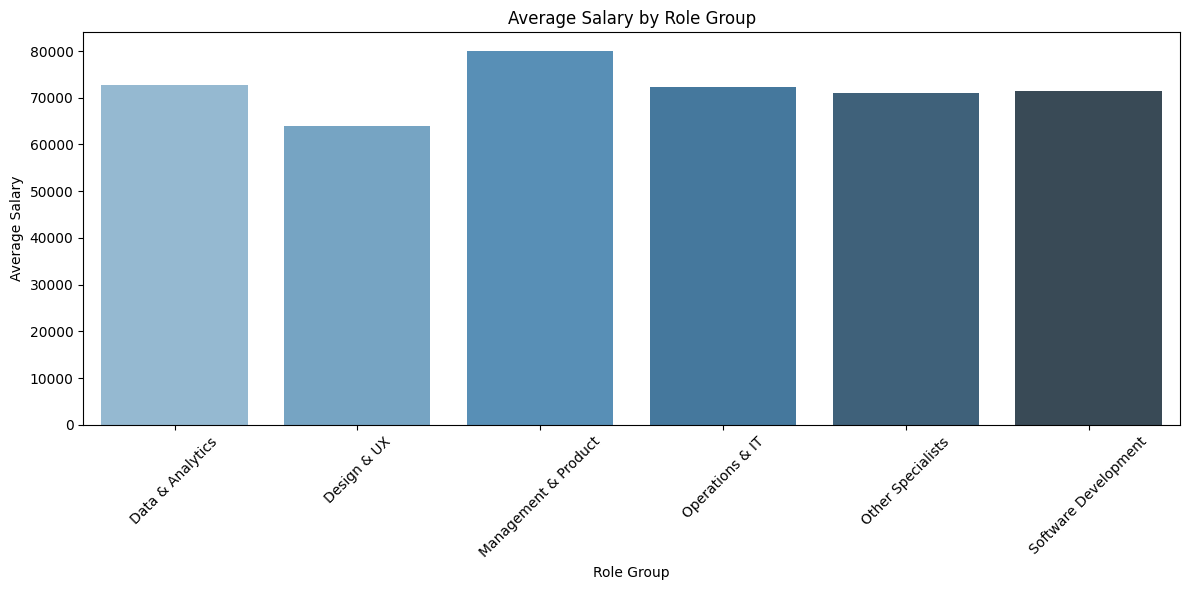

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define role groups
role_groups = {
    'Software Development': ['Software Engineer', 'Backend Developer', 'Frontend Developer', 'Full Stack Developer', 'Mobile Developer', 'Software Architect'],
    'Data & Analytics': ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer', 'Business Intelligence Analyst'],
    'Design & UX': ['UX Designer', 'UI Designer', 'Graphic Designer', 'Product Designer'],
    'Management & Product': ['Product Manager', 'Project Manager', 'Technical Lead', 'Scrum Master', 'Agile Coach'],
    'Operations & IT': ['DevOps Engineer', 'System Administrator', 'Network Engineer', 'Cloud Engineer', 'IT Support Specialist'],
    'Other Specialists': ['Marketing Specialist', 'HR Specialist', 'Financial Analyst', 'Sales Manager', 'Customer Support']
}

# Determine group for each role
def group_roles(role):
    for group, roles in role_groups.items():
        if any(r.lower() in role.lower() for r in roles):
            return group
    return 'Other Specialists'

df['Role Group'] = df['Role'].apply(group_roles)

# Calculate average salary by role group
avg_salary_by_role_group = df.groupby('Role Group')['Salary'].mean().reset_index()

# Plot using Seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='Role Group', y='Salary', data=avg_salary_by_role_group, palette='Blues_d', hue='Role Group')
plt.title('Average Salary by Role Group')
plt.xlabel('Role Group')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

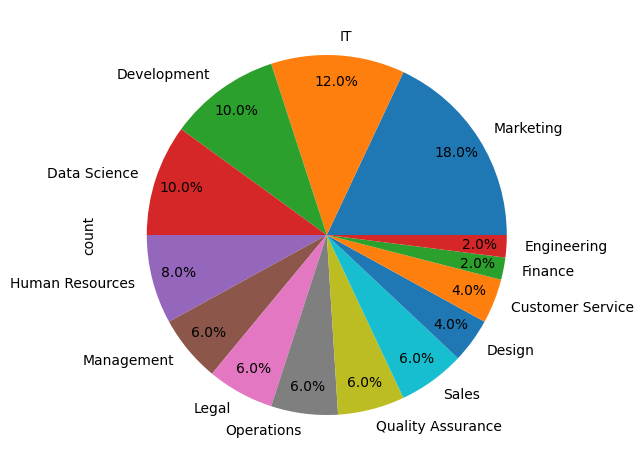

In [18]:
# Plot pie chart for distribution of departments -- Not available in Seaborn
# The distribution of departments
department_distribution = df['Department'].value_counts()
department_distribution.plot(kind='pie', autopct='%1.1f%%', pctdistance=0.85)
plt.tight_layout()
plt.show()

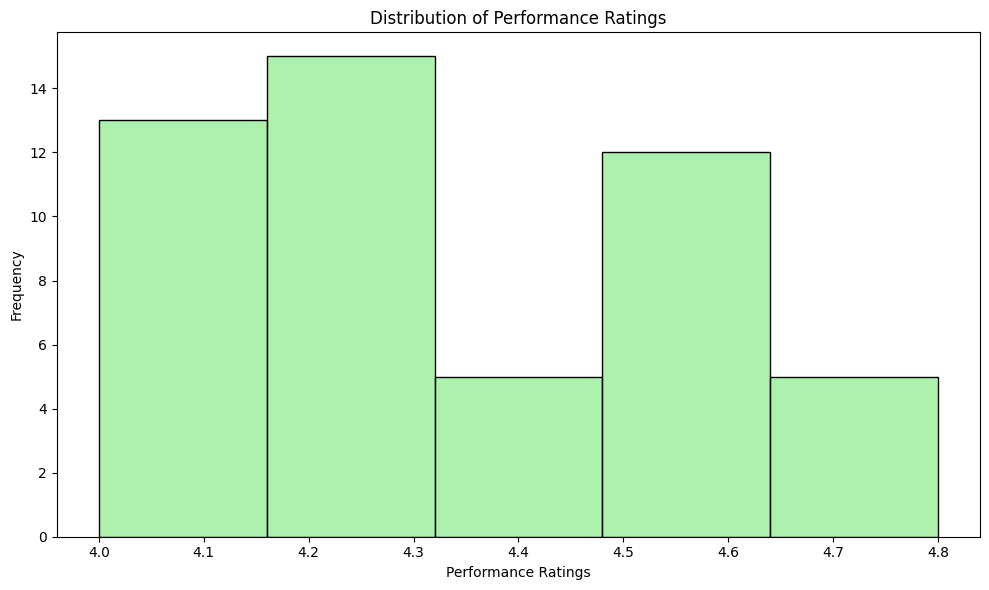

In [19]:
# Create histogram with Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['PerformanceRating'], bins=5, kde=False, color='lightgreen', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Performance Ratings')
plt.xlabel('Performance Ratings')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
# a. Salary distribution across departments
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', data=df, ax=ax)
ax.set_title('Salary Distribution Across Departments')

# Set the ticks and labels properly
ax.set_xticks(ax.get_xticks())  # Ensure ticks are set
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

save_plot(fig, '1a_salary_distribution.png')


In [21]:
# b. Salary vs. years of experience
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='YearsOfExperience', y='Salary', hue='Department', data=df, ax=ax)
ax.set_title('Salary vs Years of Experience by Department')
save_plot(fig, '1b_salary_vs_experience.png')

In [22]:
# c. Correlation between performance rating and salary
correlation = df['Salary'].corr(df['PerformanceRating'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='PerformanceRating', y='Salary', data=df, ax=ax)
ax.set_title(f'Correlation between Salary and Performance Rating: {correlation:.2f}')
save_plot(fig, '1c_salary_performance_correlation.png')

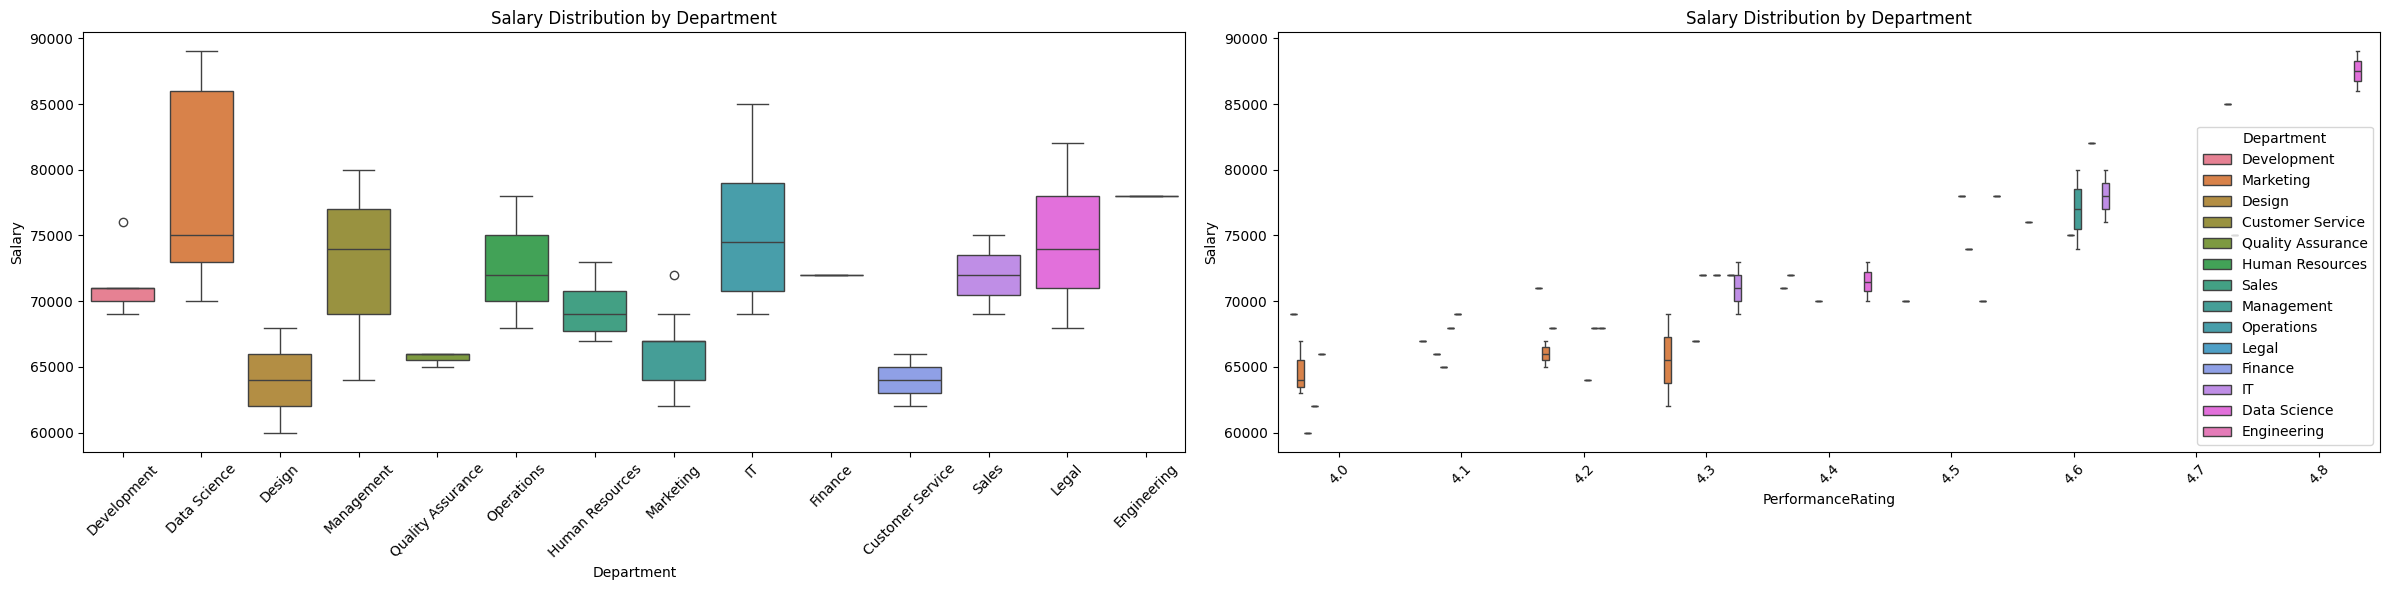

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Plot 1
sns.boxplot(x='Department', y='Salary', data=df, hue='Department', ax=ax1)
ax1.set_title('Salary Distribution by Department')
ax1.tick_params(axis='x', rotation=45)

# Plot 2 ( identical to Plot 1, but you can modify it if needed)
sns.boxplot(x='PerformanceRating', y='Salary', data=df, hue='Department', ax=ax2)
ax2.set_title('Salary Distribution by Department')
ax2.tick_params(axis='x', rotation=45)

# Adjust the layout to fit the plot elements
plt.tight_layout()

# Display the plot
plt.show()

In [24]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(df, x='YearsOfExperience', y='Salary', color='Role', size='PerformanceRating',
                 hover_name='FirstName', hover_data=['Department', 'Age'])

# Show the plot
fig.show()